In [46]:
# rich output 출력위치 설정
# => 웹 브라우저에서 바로 봄
get_ipython().run_line_magic('matplotlib', 'inline')

# 색상 출력
# 설치 방법 => pip install termcolor
from termcolor import colored
def c(tag, data, under=3):

    val = colored(tag + ':\n', 'magenta', attrs=['bold'])
    t = type(data)
    val += colored(t, 'magenta')
    under = str(under)
    
    import numpy
    if t is float or t is numpy.float64:
        val += ('\n{:.' + under + 'f}\n').format(data)
    else:
        val += '\n{}\n'.format(data)
    return val

#### <span style="color:#184;background:#EEE">2.3.5. 결정 트리</span><br>

<img src="../images/decision_tree.png" style="margin:0;width:400px"/><br>

- **<span style="color:#C22">결정 트리 만들기</span>**<br><br>

    - **"특성 i는 값 a보다 큰가?"** (연속적 데이터)의 형태로 구성됨
    - 맨 위를 루트 노드(root node), 타겟 하나로만 이뤄진 리프 노드(leaf node)를 순수 노드(pure node)라고 함

<img src="../images/decision_tree_try1.png" style="margin:0;width:370px"/><br>
<img src="../images/decision_tree_try2.png" style="margin:0;width:800px"/><br>
<img src="../images/decision_tree_try3.png" style="margin:0;width:800px"/><br>
<img src="../images/decision_tree_try4.png" style="margin:0;width:800px"/><br>

- **<span style="color:#C22">결정 트리의 복잡도 제어하기</span>**<br><br>

    - 모든 리프 노드가 순수 노드가 되면 과대적합됨
    - 과대적합을 막는 두 가지 메인 전략
    
        1. **사전 가지치기(pre-pruning)**<br><br>
        
            - 트리 내 노드 생성을 사전에 중단
            - 사이킷런에서는 이것만 지원함
                - **트리의 최대 깊이 제한**
                - **트리 내 리프 노드 개수 제한**
                - **분할 노드 개수 제한**<br><br>
        
        2. **사후 가지치기(post-pruning or pruning)**<br><br>
        
            - 트리 생성 후 데이터 포인트가 적은 노드를 삭제 or 병합       

In [47]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

# 과대적합 예시
print(c('(overfitted) accuracy on train set', tree.score(X_train, y_train)))
print(c('(overfitted) accuracy on test set', tree.score(X_test, y_test)))

tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

# 트리 깊이(max_depth) 제한
# 훈련 셋 점수는 낮아지지만 일반화 성능은 개선됨
print(c('(limited_depth) accuracy on train set', tree.score(X_train, y_train)))
print(c('(limited_depth) accuracy on test set', tree.score(X_test, y_test)))

(overfitted) accuracy on train set:
<class 'numpy.float64'>
1.000

(overfitted) accuracy on test set:
<class 'numpy.float64'>
0.937

(limited_depth) accuracy on train set:
<class 'numpy.float64'>
0.988

(limited_depth) accuracy on test set:
<class 'numpy.float64'>
0.951



- **<span style="color:#C22">결정 트리 분석</span>**<br><br>

    - 트리 모듈의 **export_graphviz** 함수를 사용 (시각화)
    - pip install graphviz
    - <https://graphviz.gitlab.io/_pages/Download/Download_windows.html><br><br>
    
- **<span style="color:#C22">트리의 특성 중요도</span>**<br><br>

    - 특성 중요도 (Feature Impotance)
    - 트리를 만드는 결정에 각 특성이 얼마나 중요한지를 평가 (총합은 1)<br><br>
    
        - 0: 해당 특성이 분류에 전혀 활용되지 않았음
        - 1: 해당 특성이 분류를 하였고, 타깃 클래스를 정확하게 예측하였음을 나타냄

feature importances:
<class 'numpy.ndarray'>
[0.         0.00752597 0.         0.         0.00903116 0.
 0.00752597 0.         0.         0.         0.00975731 0.04630969
 0.         0.00238745 0.00231135 0.         0.         0.
 0.         0.00668975 0.69546322 0.05383211 0.         0.01354675
 0.         0.         0.01740312 0.11684357 0.01137258 0.        ]



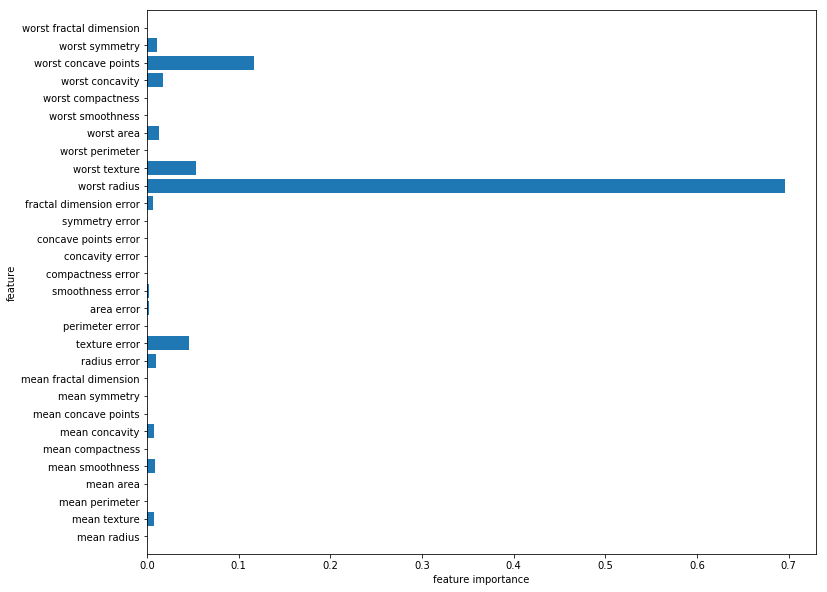

In [95]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
import numpy as np

cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

tree = DecisionTreeClassifier(random_state=0)
tree.fit(X_train, y_train)

print(c('feature importances',tree.feature_importances_))

n_features = cancer.data.shape[1]
plt.figure(figsize=(12, 10), facecolor='w', edgecolor='k')
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), cancer.feature_names)
plt.xlabel('feature importance')
plt.ylabel('feature')
plt.ylim(-1, n_features)
plt.show()

- 특성 중요도는 항상 양수이며, 어떤 클래스를 지지하는 지 알 수는 없음
    - 아래 예에서 X[1] 특성(세로축)은 두 개 클래스를 동시에 지지함

<img src="../images/decision_tree_fea_im.png" style="margin:0;width:500px"/><br>

- 결정 트리 기반의 회귀 모델 (DecisionTreeRegressor)
    - **외삽(extrapolation), 즉 훈련 데이터의 범위 밖은 예측할 수 없음 (녹색 곡선)**

Text(0,0.5,'price in $/MB')

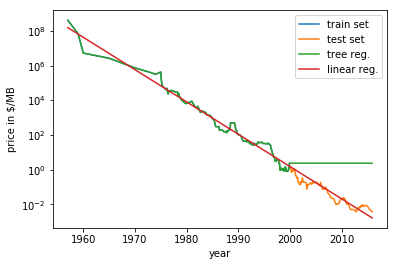

In [105]:
import os
import sys
sys.path.append('..')
import mglearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, 'ram_price.csv'))
# 2000년 이후를 test 셋으로 분리
data_train = ram_prices[ram_prices.date < 2000]
data_test = ram_prices[ram_prices.date >= 2000]

# 가격 예측을 위해 날짜 특성만을 이용
X_train = data_train.date[:, np.newaxis]
# 데이터와 타깃의 관계를 간단하게 만들기 위해 로그 스케일 적용
y_train = np.log(data_train.price)

# 모델 비교
tree_reg = DecisionTreeRegressor()
tree_reg.fit(X_train, y_train)
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

# 예측은 전체 기간에 대해서 수행
X_all = ram_prices.date[:, np.newaxis]
pred_tree_reg = tree_reg.predict(X_all)
pred_lin_reg = lin_reg.predict(X_all)

# 역-로그 스케일
price_tree_reg = np.exp(pred_tree_reg)
price_lin_reg = np.exp(pred_lin_reg)

plt.semilogy(data_train.date, data_train.price, label='train set')
plt.semilogy(data_test.date, data_test.price, label='test set')
plt.semilogy(ram_prices.date, price_tree_reg, label='tree reg.')
plt.semilogy(ram_prices.date, price_lin_reg, label='linear reg.')
plt.legend()
plt.xlabel('year')
plt.ylabel('price in $/MB')

- **<span style="color:#C22">장단점과 매개변수</span>**<br><br>
    
    - **설명**
        1. 모델 복잡도를 조절하는 것이 중요
        2. 싸이킷런의 사전 가지치기: max_depth, max_leaf_nodes, min_samples_leaf<br><br>
    
    - **강점**
        1. 시각화 쉬움, 비전문가도 이해함(작은 트리일 때)
        2. **데이터 스케일에 무관 => 특성 정규화, 표준화 등의 전처리 무필요**
        3. 특성의 스케일이 다르거나 이진 특성, 연속적 특성 혼합의 경우도 잘 작동<br><br>
    
    - **약점**
        1. **사전 가지치기를 함에도 과대적합이 쉽게 됨**
        2. 일반화 성능이 별로 => 그래서 앙상블 기법을 씀(다음 주제)<br><br>